In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('data/ham-spam.csv')
df.head()

,IsSpam,Text
0,0,key issues going forwarda year end reviews rep...
1,0,congrats contratulations the execution the cen...
2,0,key issues going forwardall under control set...
3,0,epmi files protest entergy transcoattached our...
4,0,california power please contact kristin walsh ...


In [4]:
df.groupby('IsSpam').describe()

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        500    499   paso firm capacity award memorandumlouise del...    2
1        500    500  take the reinsbecomeyour employer substantial ...    1

In [5]:
df = df.drop_duplicates()
df.groupby('IsSpam').describe()

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        499    499  key issues going forwarda year end reviews rep...    1
1        500    500  take the reinsbecomeyour employer substantial ...    1

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(
    ngram_range=(1, 2), stop_words='english'
)
x = vectorizer.fit_transform(df['Text'])
y = df['IsSpam']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0
)

In [9]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

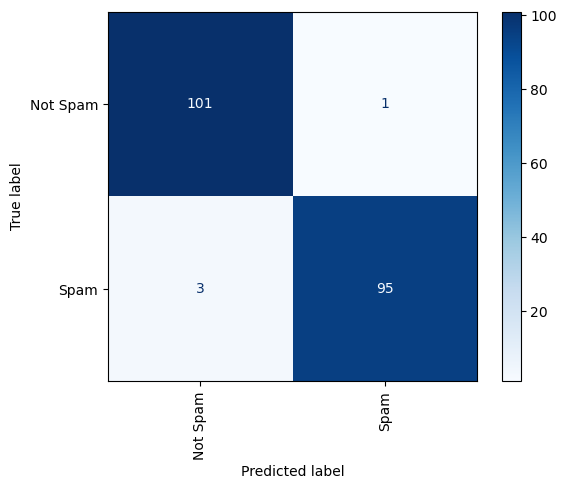

In [10]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
cmd.from_estimator(
    model, x_test, y_test, display_labels=['Not Spam', 'Spam'],
    cmap='Blues', xticks_rotation='vertical'
)

In [11]:
model.score(x_test, y_test)

0.98

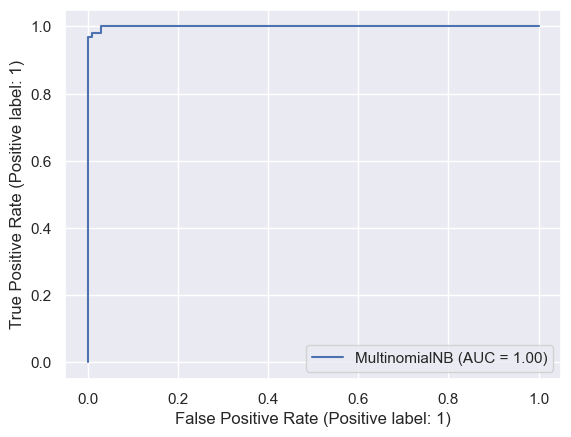

In [12]:
from sklearn.metrics import RocCurveDisplay as rcd
import seaborn as sns
sns.set()
rcd.from_estimator(model, x_test, y_test)

In [16]:
msg = ['Can you attend a code review on Tuesday to make sure the logic is solid?']
input = vectorizer.transform(msg)
model.predict(input)[0]

0

In [17]:
model.predict_proba(input)[0][0]

0.9999497111473539

In [18]:
msg = 'Why pay more for expensive meds when you can order them online ' \
      'and save $$$?'

input = vectorizer.transform([msg])
model.predict(input)[0]

1

In [21]:
# probability that the message is not spam
model.predict_proba(input)[0][0]

0.00021423891260677753

In [23]:
# probability that the message is spam.
model.predict_proba(input)[0][1]

0.9997857610873945